In [42]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим 𝑋1, ..., 𝑋𝑛 ∼ 𝐵𝑒𝑟𝑛(𝜃). По сетке значений 𝜃 ∈ [0, 1] с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от 𝜃.

In [43]:
x = np.arange(0., 1.01, 0.01)

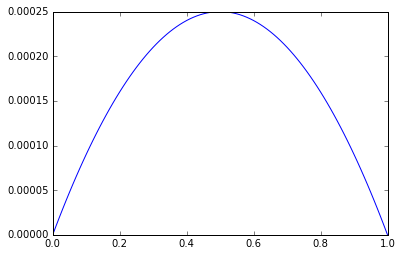

In [44]:
N = 1000.
plt.plot(x, (lambda x: x * (1. - x) / N) (x))
plt.show()

Для каждого значения 𝜃 (для той же сетки) сгенерируйте выборку размера 𝑛 = 1000 для параметра 𝜃, посчитайте эффективную оценку 𝜃 и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно 500) этой эффективной оценки 𝜃. Нарисуйте график зависимости полученных бутстрепных оценок от 𝜃.

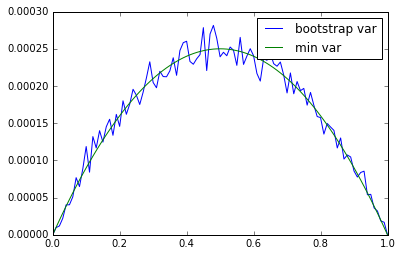

In [45]:
s2 = []
for theta in x:
    samples = sts.bernoulli.rvs(size=N, p=theta)
    theta2 = np.mean(samples)
    bootstrap = []
    for i in range(500):
        samples = sts.bernoulli.rvs(size=N, p=theta2)
        bootstrap.append(np.mean(samples))
    bootstrap2 = np.array(bootstrap) ** 2.
    s2.append(np.mean(bootstrap2) - np.mean(bootstrap) ** 2.)
plt.plot(x, s2, label="bootstrap var")
plt.plot(x, (lambda x: x * (1. - x) / N) (x), label="min var")
plt.legend()
plt.show()

Мы можем видеть, что бутстрепная оценка дисперсии приближает нижнюю оценку дисперсии из неравенства Рао-Крамера.